#Unpaired Image to Image Translation on Video Game Graphics

---
###Group Name : some group

| Name     | Student ID      |
| -------- | --------------- |
| Melanie Daixing | z5419027 |
| Tristan Fischer | z5310974 |
| Calvin Liu      | z5367106 |
| Leon Xu         | z5361413 |
| Guozhi Zhao     | z5319307 |

# 1 Introduction

## 1.1 Background
The visual style of older games can often appear dated and low in quality due
to the technical limits of computer hardware being unable to create high-end visual scenery and graphics at the time. As a result, many older games often feature pixelated textures, low-resolution assets, simplified visual effects and a dimmer, less vibrant design.

Traditional methods of improving the graphics quality of older games involve completely redesigning the game, which can be extremely time consuming and expensive. Our project attempts to use an approach that utilises AI that enhances the visual appeal of older games without completely redesigning them.


## 1.2 Motivation
With rapid advancements in technology, player expectations for a visually immersive gaming experience have risen. We wish to explore and evaluate some of the different methods for transferring image styles, and test whether these methods can be used to transfer the visual style of modern games to older games of a similar genre, giving them new, visually appealing graphics. Testing the transfer of visual styles between games of a similar aspect is crucial, as it ensures that the adapted visuals will still align with the overall theme and elements of the original game, creating a more cohesive experience for players.

## 1.3 Problem Statement
Our objective for this project is to enhance the visual aesthetics of computer games designed in the early 2000s by using style transfer methods on more modern games designed around 20 years later. We will be analysing the accuracy of the results obtained from using different methods on the same dataset.
Specifically, we have chosen to enhance the visuals of Counter Strike 1.6 (released in 2003) by using style transfer methods on Valorant (released in 2020).

#2 Dataset

## 2.1 Data Information
The link to find the dataset: [here](https://unsw-my.sharepoint.com/personal/z5310974_ad_unsw_edu_au/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Fz5310974%5Fad%5Funsw%5Fedu%5Fau%2FDocuments%2FDataset%20COMP9444)

Our dataset includes both prerecorded and handmade gameplay and environment footage of Counter Strike 1.6 and Valorant. For Counter Strike 1.6, we used prerecorded gameplay on mmultiple maps that we converted into an image sequence. For Valorant, we had both prerecorded gameplay and we also recorded our own gameplay on different maps where each map has different visual elements such as environment textures and colourings. We also recorded videos of the environment only, with no combat gameplay involved. These videos were also converted into image sequences, which we put in our final dataset.  

We split our dataset so that we had approximately 4000 images for each game used in training, and 4000 images for each game used in testing.

## 2.2 Data Parameters
We chose our parameters for all our models based off of the CycleGAN model we used, which had a dataset comprising roughly 1000 images for each class. This paper trained their dataset for 100 epochs with the same learning rate and then decayed their learning rate for the next 100 epochs. As our dataset is approximately 4 times larger, we decided to scale our epochs by ¼ and due to our time constraints, we further lowered the number of epochs to 20. We trained each model with a batch size of 4 except UNSB which we trained with a batch size of 1.

#3 Models

The models we chose to analyse range from well established GAN architectures used in image style transfer to new, innovative methods that are still being researched.

## 3.1 Generative Adversarial Networks (GANs)
A Generative Adversarial Network is a deep learning model for generating high-quality data such as images, audio or text. The core idea of a GAN is to have two neural networks competing with each other to accomplish a generative task: one is a generator and the other is a discriminator. These two networks are involved in the training process where they interact with each other to encourage the generator to produce more realistic data.

##3.2 CycleGAN

The link to the paper we referenced can be found here: https://arxiv.org/abs/1703.10593

The link to the CycleGAN architecture we used can be found here: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

We chose to use this CycleGAN model as it is has demonstrated good performance in image translation tasks from a horse to a zebra, as well as being well refined and the framework for many other image style transfer models.

This model consists of 28.286 million trainable parameters split up into the following networks:

* Generative Network A - 11.378 million trainable parameters
* Generative Network B - 11.378 million trainable parameters
* Descriptor Network A - 2.765 million trainable parameters
* Descriptor Network B - 2.765 million trainable parameters

Normal GANs are composed of 2 neural networks, a generator and a discriminator however a CycleGAN is composed of 2 GANs. This method exploits the property that translation should be “cycle consistent” meaning that if there is a translator G: X→Y and F:Y→X then G and F should be inverses of each other. This is then applied by training G and F simultaneously and adding a cycle consistency loss that encourages F(G(X))=X and G(F(Y))=Y.

Well-established architecture such as this model have typically undergone rigorous testing and optimisation, making it more likely to be stable across our own dataset.


### Training
This model uses a least-squares loss function, which is more stable during training and is able to provide higher quality results. The dataset used by this paper had roughly 1000 images for each class and their model was trained for 200 epochs, which is approximately a quarter of the size of our dataset. Hence, we decided to scale our epochs to be roughly a quarter of theirs, but due to time constraints we lowered this number to 20.  

When we trained the model from scratch with our dataset and a batch size of 4, we kept the learning rate at 0.0002 for the first 10 epochs, and then linearly decayed the rate to zero for the next 10 epochs. The average training time was 10 minutes per epoch.


####Training Command Arguments

In [ ]:
python train.py --dataroot "C:\Users\Tristan\Desktop\9444 Dataset" --name game_transfer_cycle_gan --model cycle_gan --batch_size 4 --n_epochs 20 --n_epochs_decay 20

###Testing Command Arguments

In [ ]:
python test.py --dataroot "C:\Users\Tristan\Desktop\9444 Dataset" --name game_transfer_cycle_gan --model cycle_gan --batch_size 4 --num_test 4000 --phase test

##3.3 Contrastive Unpaired Image-To-Image Translation GAN

The link to the paper we referenced can be found here: https://arxiv.org/pdf/2007.15651

The link to the CUT GAN architecture we used can be found here: https://github.com/taesungp/contrastive-unpaired-translation

We chose to use Contrastive Unpaired Translation GAN as it is a more efficient version of the CycleGAN model we used previously.

This model consists of 14.703 million trainable parameters split up into the following networks:
* Generative Network - 11.378 million trainable parameters
* Feature Map Network - 0.560 million trainable parameters
* Descriptor Network - 2.765 million trainable parameters

This model uses feature maps between the input image and the generated images to compare similarity and generate a loss by grouping these feature pairs together. It aims to maximize the mutual information between corresponding input and output patches.

The patchwise contrastive learning achieves its task by using the InfoNCE loss function, which generates positive and negative sample pairs to compare with. A positive pair consists of an ‘anchor’ reference point and an augmentation of the same underlying content, while negative pairs are formed with the anchor and another data point that is not the same. Higher scores are given to positive pairs and lower for negative pairs, which lets the model learn to maximize mutual information between positive pairs while minimizing mutual information between negatives.


###Training

We trained the model on our dataset from scratch using Xavier initialisation. As this model uses the CycleGAN model as a framework, we kept the learning rate, number of epochs and batch size the same. Thus, we kept the learning rate at 0.0002 for the first 10 epochs, and then linearly decayed the rate to zero for the next 10 epochs and trained the model with a batch size of 4. The average training time for this model was 12 minutes per epoch.

#### Training Command Arguments


In [ ]:
python train.py --dataroot "9444 Dataset" --name CUT_Model --CUT_mode CUT --batch_size 4 --n_epochs 20 --n_epochs_decay 20

###Testing Command Arguments

In [ ]:
python test.py --dataroot "9444 Dataset" --name CUT_Model --CUT_mode CUT --phase test --batch_size 4 --num_test 4000

## 3.4 Unpaired Image-to-Image Translation with Density Changing Regularization (DECENT)

The link to the paper we referenced can be found here: https://openreview.net/pdf?id=RNZ8JOmNaV4

The link to the DECENT architecture we used can be found here: https://github.com/Mid-Push/Decent

This method is based on the CUT GAN model referenced previously, and utilises density estimators and patch representations to generate images. We've decided to evaluate the accuracy of this model on our dataset as it is well researched and utilises a different method for image style transfer.

This model consists of 22.703 million trainable parameters split up into the following networks:

* Network G - 11.378 million trainable parameters
* Network F_A - 4.280 million trainable parameters
* Network F_B - 4.280 million trainable parameters
* Network D - 2.765 million trainable parameters

This method requires the network to learn a mapping G:X→Y such that G(X) looks like the images in the domain Y whilst preserving necessary information. For example, when translating a segmentation map to a real-world photo, the generated photo needs to look realistic whilst the contents (buildings, trees and roads) in the generated photo follow the segmentation map. This is implemented by two density estimators that compute the density of certain areas in the image and penalise variances in density changes of patches.



###Training

As this model uses the CUT GAN model as a framework, we kept the learning rate, number of epochs and batch size the same. Thus, we kept the learning rate at 0.0002 for the first 10 epochs, and then linearly decayed the rate to zero for the next 10 epochs and trained the model with a batch size of 4. The average training time for this model was 6 minutes per epoch.

####Training Command Arguments

In [ ]:
python train.py --dataroot="Dataset" --batch_size 4 --n_epochs 20 --n_epochs_decay 20 --name DECENT --lambda_var 0.01 --var_all --flow_blocks 1 --flow_lr 0.001 --flow_type bnaf

###Testing Command Arguments

No testing script used.

## 3.5 Unpaired Image-to-Image Translation via Neural Schrödinger Bridge (UNSB)

The link to the paper we referenced can be found here: https://arxiv.org/abs/2305.15086

The link to the UNSB architecture we used can be found here: https://github.com/cyclomon/UNSB

This model consists of 21.539 million trainable parameters split up into the following networks:

* Network G - 14.684  million trainable parameters
* Network F - 0.560 million trainable parameters
* Network D - 3.143 million trainable parameters
* Network E - 3.152 million trainable parameters

This is an extremely new model that applies diffusion models, which are capable of high quality data synthesis, combined with a Schrödinger Bridge based approach to translation tasks.

We've chosen to also analyse the results generated by this model that has an extremely new and innovative approach. This may address some limitations of previous models and efficiently generate an image with higher accuracy.

This method also utilises an advanced Markovian discriminator, which is able to distinguish data on a patch level, and is extremely effective at capturing the style of the target data. The multi-step nature of this model allows it to have better performance than GAN based translation methods.

###Training

This model had a higher video RAM usage, so we decreased the batch size to 1. This in turn increased the inference time as well as the average training time for this model, which was 33 minutes per epoch. We kept the learning rate at 0.0002 for the first 10 epochs, and then linearly decayed the rate to zero for the next 10 epochs.

####Training Command Arguments

In [ ]:
python train.py --dataroot="9444 Dataset" --batch_size 1 --n_epochs 20 --n_epochs_decay 20 --name UNSB --mode sb --lambda_SB 1.0 --lambda_NCE 1.0 --gpu_ids 0

###Testing Command Arguments

No testing script used.

#4 Results


## 4.1 FID/KID Results
|          | FID  **↓** | KID  **↓** |
| -------- | --------- | --------- |
| CycleGAN | **125.2** | **0.107** |
| UNSB     | 169.8     | 0.165     |
| CUT      | 180.8     | 0.178     |
| DECENT   | 211.3     | 0.216     |



### 4.1.1 Metric Appropriateness

The standard for unpaired image to image translation in the context of Generative Adversarial Networks is to assess the visual quality through the Fréchet Inception Distance (FID), a metric that computes the divergences between real and generated images. The goal of GANs is to eventually produce plausible samples but in doing so it sometimes focuses on selective features without considering the properties of the real distribution. This is solved via FID through capturing the significant features from both real and generated distributions through an Inception object-recognition network. The Fréchet distance is then evaluated, a quantitative measurement of similarity between distributions. This in turn allows for both the fidelity and the diversity of images to be evaluated. This metric has also been shown to correlate well with human judgements of visual quality.

There are some noticeable drawbacks to FID scores, however, notably in the pre-trained Inception model's incapacity to capture some features and the necessity for a larger sample size (it is best computed with 50 thousand samples). To accomodate for this drawback, Kernel Inception Distance (KID) was utilised in conjunction with FID. KID does not require a larger sample size as it does not need to fit the quadratic covariance matrix.  

### 4.1.2 Metric Implementation

[Repo Link](https://github.com/abdulfatir/gan-metrics-pytorch)

Images were resized to 256/256 then default settings for the linked repo were used for this evaluation. As our dataset exceeded the recommended 2048 required images, the default pool3 feature layer for the Inception network was sufficient.

Below is the command argument for the evaluation.

In [ ]:
python -m pytorch_fid path/to/dataset1 path/to/dataset2

### 4.1.3 Method Comparisons

There is no objective loss function to assess progress of training in the context of GANs. As noted previously, FID is generally considered the main metric for GAN model evaluations. However, there are other possible evaluation methods for GAN-applied image generation.

Kernel Inception Distance (KID): In conjunction with the FID, we also implemented an evaluation based on KID. This is consistent with initial evaluations in the DECENT/UNSB papers which also utilised both during evaluation.

Inception Score: The Inception Score is limited as it evaluates based on fake images without comparing it to any real images. Multiple comparative assessments showcase its inferiority to FID in terms of both synchronising with human judgments and detecting subtle changes in the image such as gaussian blurs.









## 4.2 FVD Results

|          | FVD2048_16F ↓ | FVD2048_128F ↓ | FVD2048_128F_ss8F ↓ |
| -------- | ------------ | ------------- | ------------------ |
| CycleGAN | **2208.7**       | **2152.8**        | 1978.6             |
| UNSB     | 3641.5       | 2409.5        | 2407.4             |
| CUT      | 2528.2       | 4309.3        | **1306.9**             |
| DECENT   | 2990.9       | 3388.4        | 2183.4             |


### 4.2.1 Metric Appropriateness

A more specific metric for the current scope of the project is an adaptation of the Fréchet Inception Distance for the purpose of evaluating videos generated by GANs, currently implemented via Fréchet Video Distance (FVD). FVD considers not only the visual representation of objects but also the temporal dynamics (temporal coherence, how objects interact etc.).

In addressing the context of this project, an enhancement of the visual aesthetics of older games should also be high quality in terms of these temporal dynamics.


### 4.2.2 Metric Implementation

[Original Repo Link](https://github.com/google-research/google-research/blob/master/frechet_video_distance/frechet_video_distance.py)

[Reimplementation Repo Link
](https://github.com/universome/stylegan-v/blob/master/src/scripts/calc_metrics_for_dataset.py)

[Equivalency Showcase Repo Link](https://github.com/universome/fvd-comparison)

For the FVD evaluation we used a reimplementation of the original Tensorflow I3D model trained on Kinetics-400 which was converted to TorchScript. The reimplementation model performs identical operations to the original and therefore comparisons can be shared.

Below is the command argument for the evaluation.


In [ ]:
python src/scripts/calc_metrics_for_dataset.py --real_data_path /path/to/dataset_a.zip --fake_data_path /path/to/dataset_b.zip --mirror 1 --gpus 4 --resolution 256 --metrics fvd2048_16f,fvd2048_128f,fvd2048_128f_subsample8f --verbose 0 --use_cache 0

### 4.2.3 Method Comparisons


The two main metrics often utilised for generative models producing videos are Peak Signal to Noise Ratio (PSNR) or Structural Similarity index (SSIM). However, FVD has been demonstrated to function as a better comparative metric in terms of similarity with subjective human judgment and its methodology is more suitable to the scope of this project.

In comparison to the potential metrics, FVD is a more appropriate metric for the current evaluative task due to prioritisation of distributions over an entire video. Therefore, FVD bypasses complications that might originate from excessive frame-level analysis. Given the length and degree of this project’s scope, this difference is significant. The evaluation of individual frame quality is also performed in this report through average FID scores and therefore similar further evaluation through PSNR/SSIM are redundant. Furthermore, in the context of future training, FVD’s capacity to function independently of ground-truth sequences is compatible with the potential of GANs.

## 4.3 Training Time Results

|          | Training time (min) |
| -------- | ------------------- |
| CycleGAN | 10                  |
| UNSB     | 33                  |
| CUT      | 12                  |
| DECENT   | **7.5**             |

## 4.4 Model Loss Graphs

In the loss graphs for all of these models, the discriminator loss is extremely close to zero and the generator loss is only slightly positive, between 1 and 0. Since the loss values are on average low, the model generally works well, however the values are oscillating slightly. This indicates that the learning rate may be too high for the dataset that we are using with the models. The low discriminator loss means that the discriminator is very good at discerning between real and fake images, so the generator is not producing images of a high enough quality to fool the discriminator.

### 4.4.1 CycleGAN
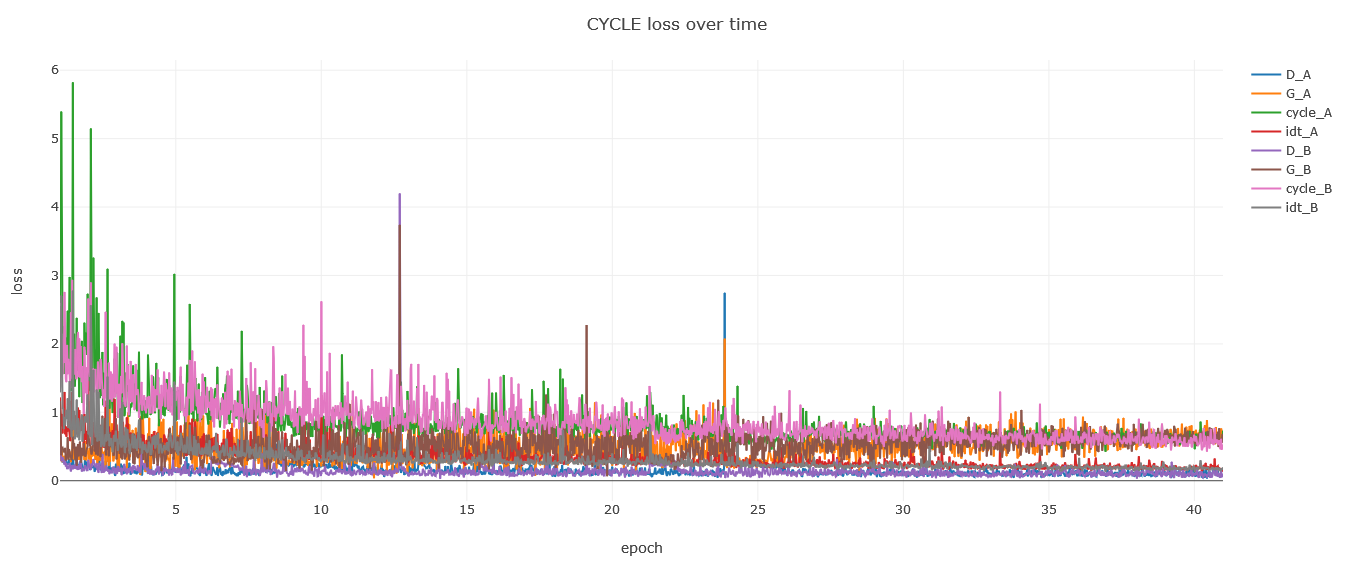

### 4.4.2 CUT GAN
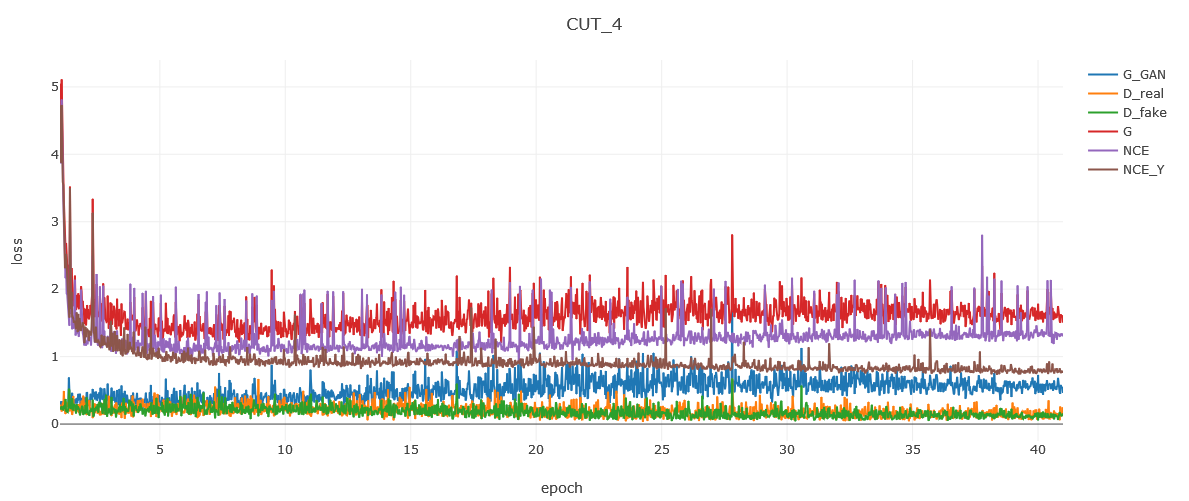

### 4.4.3 UNSB
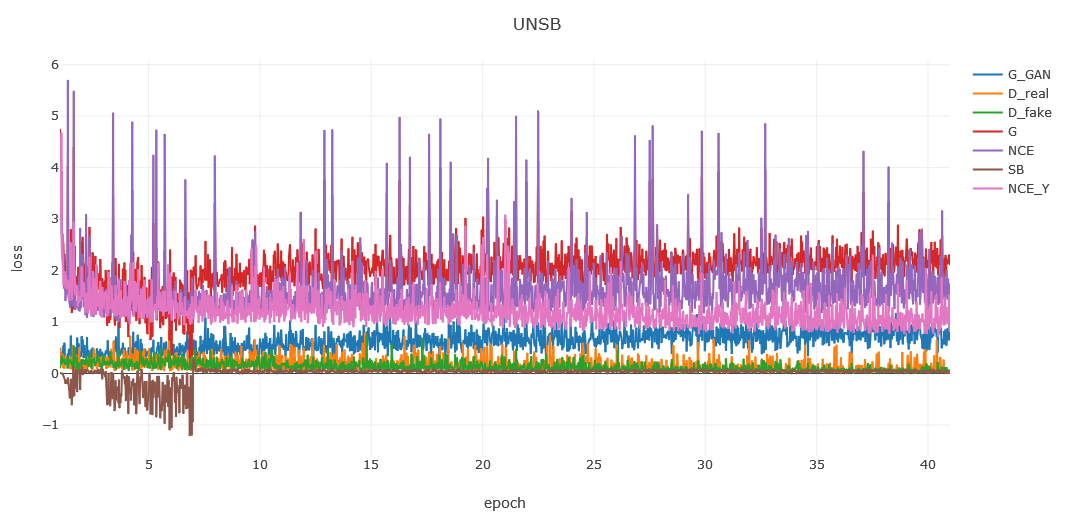

### 4.4.4 DECENT

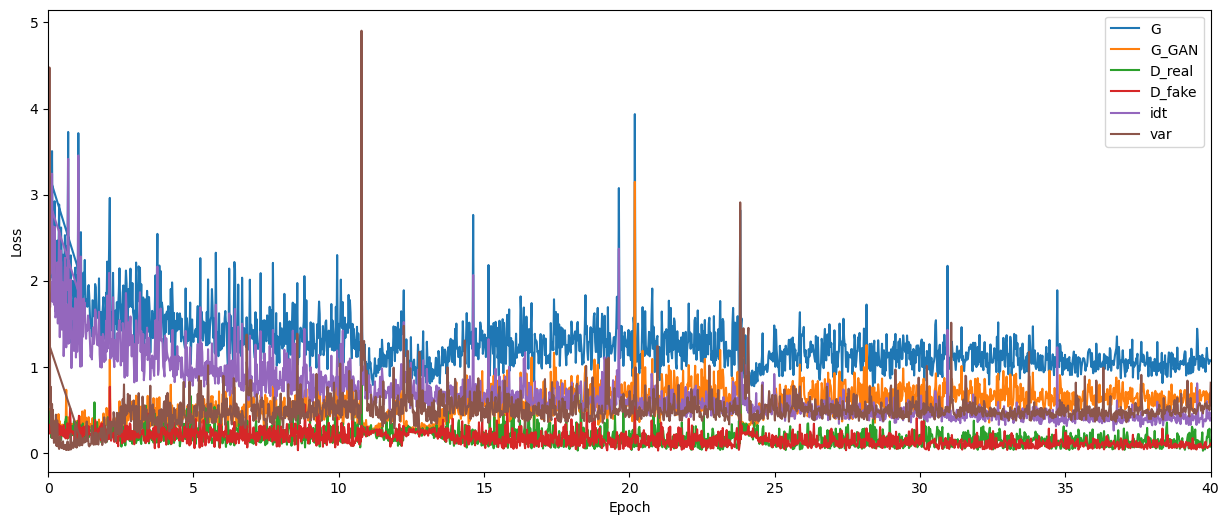

## 4.5 Comparison Visualisations

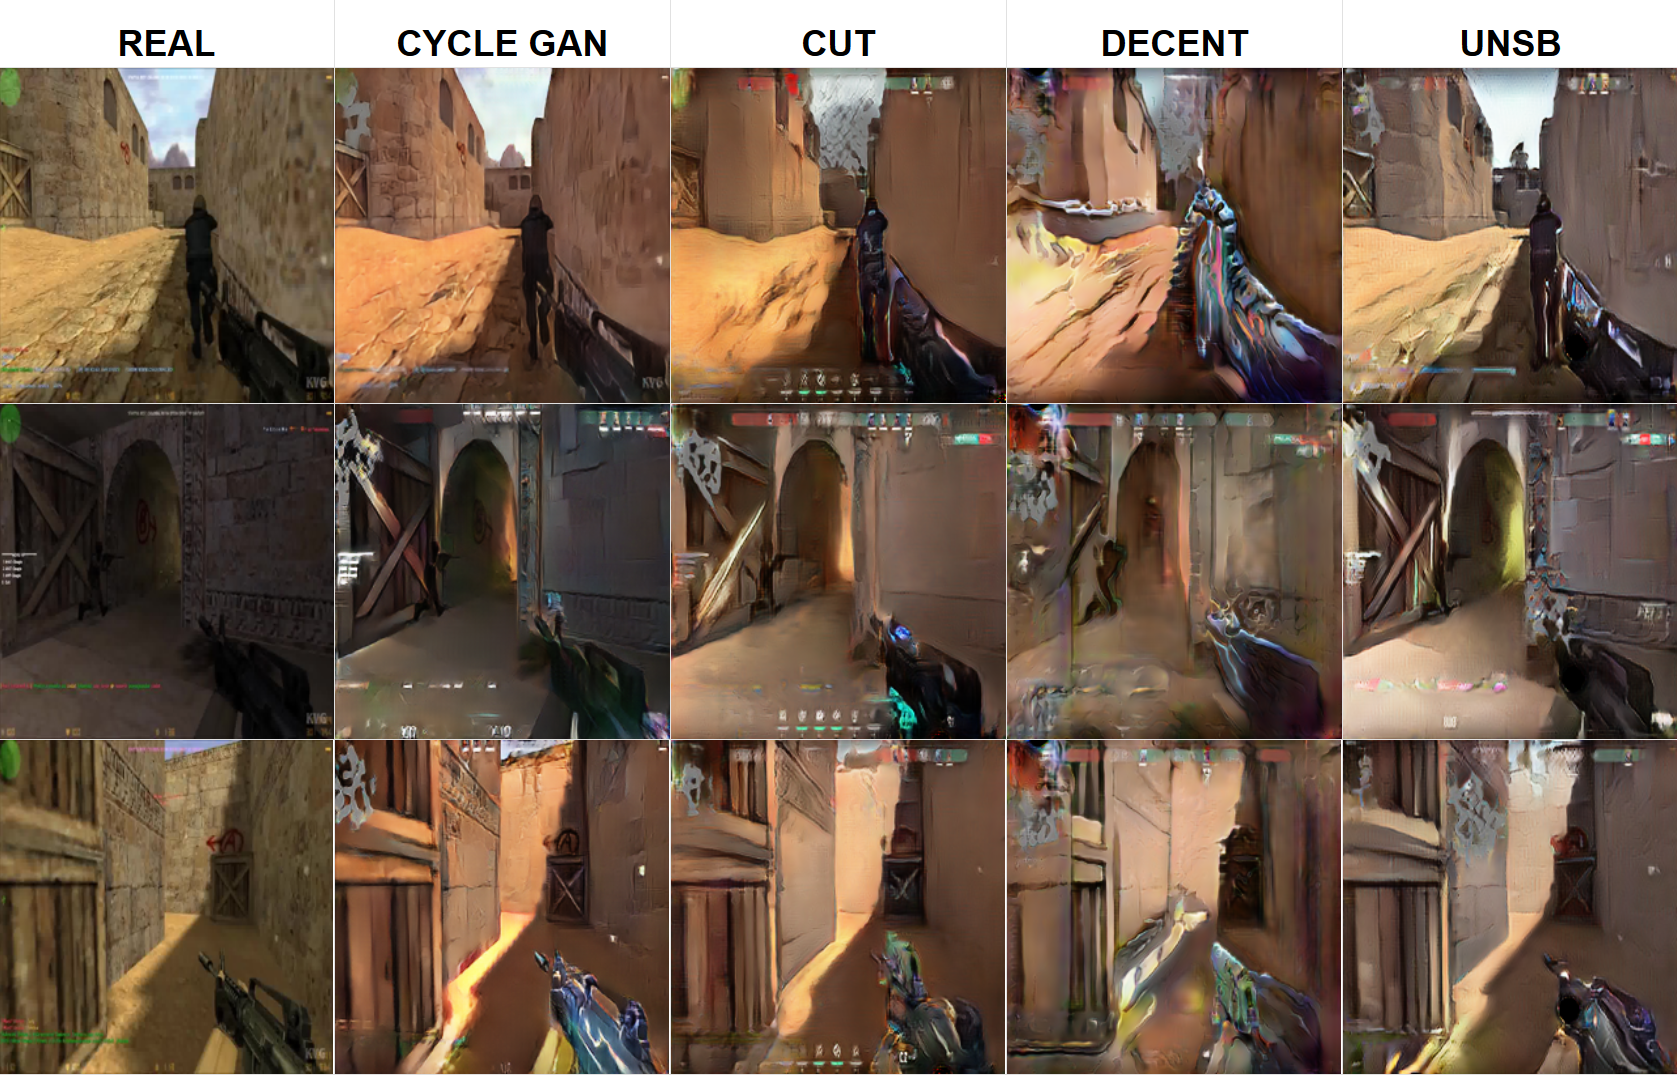

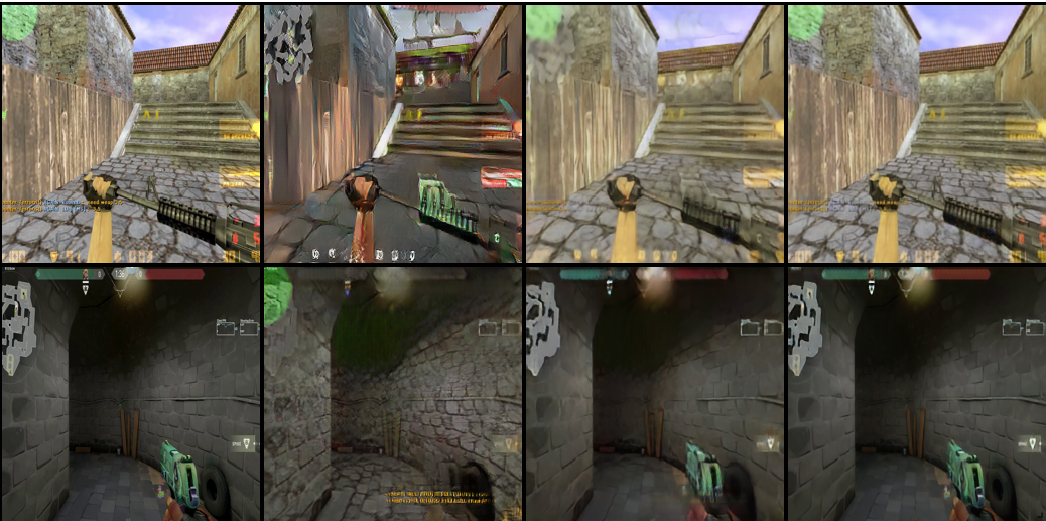

#5 Discussion

## 5.1 Results Analysis
The original images provided include one snapshot of gameplay and two snapshots of the environment in varying light and dark gradients. The main objects included are the sky, walls, the ground and obstacle crates.

In terms of colour palette, the original image is tinted a dark yellow, with shadowed areas being extremely dark. The images generated by CycleGAN and CUT have an unrealistic deep orange tint, with artificial lighting replacing the shadows, more so for CUT than CycleGAN. On the other hand, DECENT and UNSB produce a slightly more peach coloured reshading of the images however they also replace the shadows with artifical brightness.

The textures in the original images make the ground seem more cobblestone like, and the lines are mostly well defined. All the models have undergone varying amounts of texture smoothing in relation to the ground and walls, with CycleGAN still maintaining some line definition for the cobblestone textures and CUT, DECENT and UNSB have almost no fine detailing in relation to ground textures. In all of the output images, the map on the top left is randomly generated and doesn't match the gameplay as Counter Strike 1.6 does not have a map and Valorant does.

Due to the variety in gun shapes in our dataset, the style transfer of the gun caused many issues in the output images of some models. CycleGAN transfers the gun skin the best, keeping the model of gun consistent and well outlined and just changing the colour of the gun model to involve patterns. CUT and UNSB both had some issues with transferring the model of the gun, as their images include different gun models, however they mostly transfer the colouring well with only some slight blurring around the edges of the gun. The worst performing model in this element was DECENT, who had a lot of trouble keeping the gun model consistent which may be due to its style transfer process having image density as an important factor.

In terms of overall image coherence, CycleGAN by far produces the best images, with CUT performing moderately, UNSB slightly worse and DECENT performing poorly. However, DECENT also attempts to transfer more of the modern game style than the other methods, while the other models mainly did a colour reshading, which may be why it performed so poorly.

## 5.2 Strengths and Weaknesses

Some models performed relatively well in transferring the image style of Valorant to Counter Strike 1.6. This was observed in the style transfer of the texture colouring in the games, where most of the models had a consistent, realistic looking reshading that increased the vibrancy of the input images.

Unfortunately, for most of the models the environmental textures did not transfer well. This may be due to the models' respective style transfer methods, as CUT GAN, DECENT and UNSB all utilise methods like density estimations and patchwise contrastive learning that preserve structural similarities during translation. This has also caused the minimap textures, which may be mistaken as having a similar texture to the environment, for the results of these models to appear in the middle of the screen. The gun textures also have not transferred well for these three models, with the different colourings and shapes of Valorant guns causing the guns in the output image to become misshapen.




## 5.3 Limitations and Improvements

The performance of these models were most likely affected by the characteristics of the dataset we used to train them with. As Counter Strike 1.6 does not have a minimap in the top left and Valorant does, the models generated textures that appeared like a map, however did not reflect the gameplay and the environment of the player. Counter Strike 1.6 gun types also look mostly similar to each other, however Valorant gun types do not. Due to the Valorant dataset having recorded footage with different types of guns, the output images for some of the models sometimes replaced the intended larger rifle with an unintended smaller pistol.

Improvements to the dataset could be made by recording the environment and the gameplay of Valorant with the minimap disabled. The larger, rifle gun type should also be consistently used in all the recordings so that the models are able to consistently transfer the gun skin textures.

Without a time constraint, all of the models could be trained for a longer time by increasing the number of epochs or adjusting other parameters such as the training rate, which may also aid in obtaining a more accurate image transfer.

## 5.4 Future Work
Reflecting on the project our group has worked on this term, there are many ways we can improve and further develop our work. This includes finding and testing a larger variety of models with differing image style transfer methods and seeing how well each model is able to accurately translate the visual styles from the modern game to the older game.

Another way we could further develop the ideas behind this project is by finding a way to stylize older games to look like modern games in real time. This would require a neural network capable of extremely fast processing, with low latency and an ability to sustain a moderate number of frames per second.

Potential challenges would be finding a base image style transfer model that is able to accurately output translated images, and then adjusting the parameters and potentially the model itself to improve performance to a playable quality.

#6 References

* Zhu, J.Y., Park, T., Isola, P. and Efros, A.A., 2017. Unpaired image-to-image translation using cycle-consistent adversarial networks. In Proceedings of the IEEE international conference on computer vision (pp. 2223-2232).
* Park, T., Efros, A.A., Zhang, R. and Zhu, J.Y., 2020. Contrastive learning for unpaired image-to-image translation. In Computer Vision–ECCV 2020: 16th European Conference, Glasgow, UK, August 23–28, 2020, Proceedings, Part IX 16 (pp. 319-345). Springer International Publishing.
* Xie, S., Ho, Q. and Zhang, K., 2022. Unsupervised image-to-image translation with density changing regularization. Advances in Neural Information Processing Systems, 35, pp.28545-28558.
* Kim, B., Kwon, G., Kim, K. and Ye, J.C., 2023. Unpaired Image-to-Image Translation via Neural Schrödinger Bridge. arXiv preprint arXiv:2305.15086.
*Betzalel, E., Penso, C., Navon, A. and Fetaya, E., 2022. A study on the evaluation of generative models. arXiv preprint arXiv:2206.10935.
*Lucic, M., Kurach, K., Michalski, M., Gelly, S. and Bousquet, O., 2018. Are gans created equal? a large-scale study. Advances in neural information processing systems, 31.
*Unterthiner, T., Van Steenkiste, S., Kurach, K., Marinier, R., Michalski, M. and Gelly, S., 2018. Towards accurate generative models of video: A new metric & challenges. arXiv preprint arXiv:1812.01717.